In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

In [45]:
df = pd.read_csv('/Users/harshitgupta/Desktop/vs /VS-Data-Den/model_training/regional_master_50000009.csv',index_col='YEARWEEK',parse_dates=True)
# df.index.freq='MS'

In [46]:
df.head()

,TOTAL_SALES
YEARWEEK,
2018-01-01,1721999
2018-01-08,902891
2018-01-15,1046163
2018-01-22,876159
2018-01-29,1161595


<Axes: xlabel='YEARWEEK'>

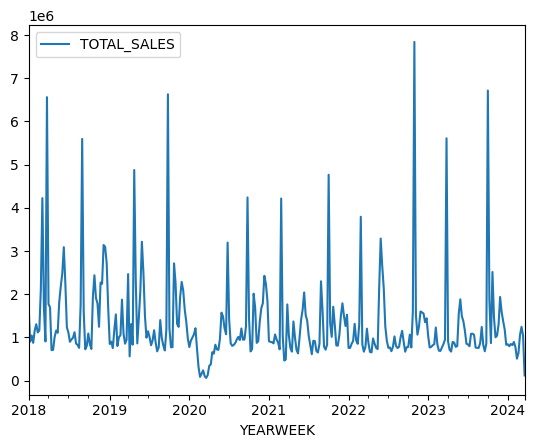

In [47]:
df.plot()

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose


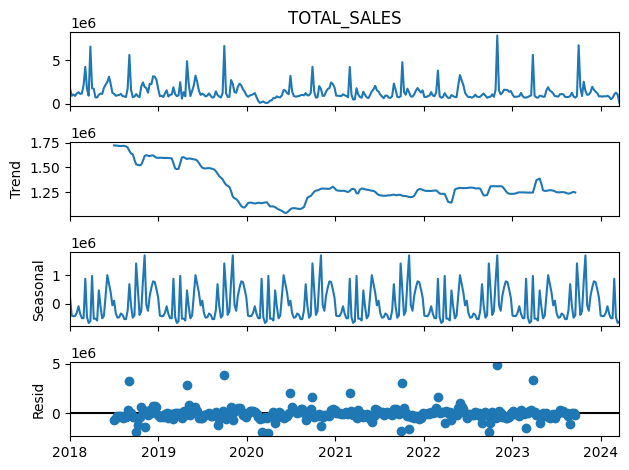

In [49]:
ANNUAL_PERIOD = 365*24
mult_decomp = seasonal_decompose(df['TOTAL_SALES'])
mult_decomp.plot()
plt.show()

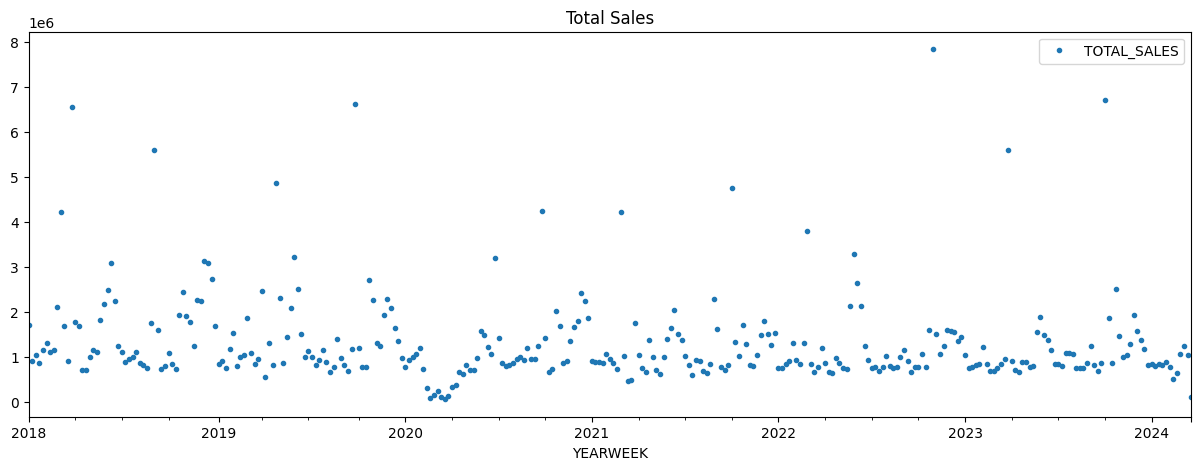

In [50]:

color_pal = sns.color_palette()
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Total Sales')
plt.show()

In [51]:
df['YEAR'] = df.index.year
df['MONTH'] = df.index.month
df['DAY'] = df.index.day
df['DAY_OF_WEEK'] = df.index.dayofweek
df['WEEK_OF_YEAR'] = df.index.isocalendar().week


In [52]:
train = df.iloc[:int(0.6*len(df))]
test = df.iloc[int(0.6*len(df)):]


In [53]:
features = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'WEEK_OF_YEAR']
target = 'TOTAL_SALES'


In [54]:
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

In [55]:
X_train.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,WEEK_OF_YEAR
YEARWEEK,,,,,
2018-01-01,2018,1,1,0,1
2018-01-08,2018,1,8,0,2
2018-01-15,2018,1,15,0,3
2018-01-22,2018,1,22,0,4
2018-01-29,2018,1,29,0,5


In [56]:
y_test.tail()

YEARWEEK
2024-02-19     640202
2024-02-26    1060437
2024-03-04    1247705
2024-03-11    1042492
2024-03-18     120695
Name: TOTAL_SALES, dtype: int64

In [57]:
lgb_reg = lgb.LGBMRegressor(learning_rate=1)
lgb_reg.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 195, number of used features: 4
[LightGBM] [Info] Start training from score 1372478.851282
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

LGBMRegressor(learning_rate=1)

In [58]:
# model = xgb.XGBRegressor(X_train, y_train, X_test, y_test)

In [59]:
# results = model.fit()

In [60]:
y_pred_train_lgb = lgb_reg.predict(X_train)
train_rmse_lgb = np.sqrt(mean_squared_error(y_train, y_pred_train_lgb))


In [61]:
y_pred_test_lgb = lgb_reg.predict(X_test)
test_rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_test_lgb))


In [62]:
train_rmse_lgb , test_rmse_lgb

(299217.00695156516, 1096643.650901183)

In [63]:
predictions = pd.DataFrame({'Date': test.index, 'Actual_Sales': y_test, 'Predicted_Sales': y_pred_test_lgb})


In [64]:
predictions

,Date,Actual_Sales,Predicted_Sales
YEARWEEK,,,
2021-09-27,2021-09-27,835136,1.155687e+06
2021-10-04,2021-10-04,4765110,6.851834e+05
2021-10-11,2021-10-11,1326006,7.026693e+05
2021-10-18,2021-10-18,1013609,-4.604568e+04
2021-10-25,2021-10-25,1711620,6.740425e+05
...,...,...,...
2024-02-19,2024-02-19,640202,1.201048e+06
2024-02-26,2024-02-26,1060437,2.322333e+06
2024-03-04,2024-03-04,1247705,1.621393e+06


In [65]:
# test['prediction'] = xg_reg.predict(X_test)

# df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

# df.tail(2)

In [66]:

# ax = df[['TOTAL_SALES']].plot(figsize=(15, 5))

# df['prediction'].plot(ax=ax, style='.')
# plt.legend(['Ground Truth Data', 'Predictions'])
# ax.set_title('Actual Past Data and Prediction')
# plt.show()

In [67]:
combined_data = pd.concat([train, test])


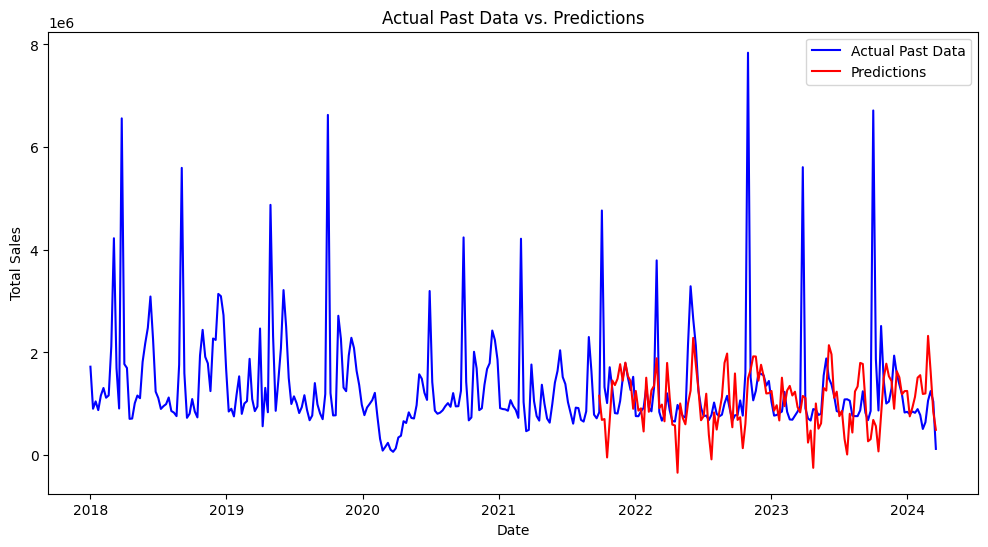

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['TOTAL_SALES'], label='Actual Past Data', color='blue')
plt.plot(test.index, y_pred_test_lgb, label='Predictions', color='red')
plt.title('Actual Past Data vs. Predictions')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [69]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_lgb))

In [70]:
rmse

1096643.650901183